In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hnl_apps.utils_limits import bayesian_upper_limit, n_events_T2K, masses_t2k


In [3]:
main_folder = 'nd280-heavy-neutrino-search-2018_main/'
flux_filename = 'flux.npy'
eff_filename = 'efficiency.npy'

In [4]:
flux = np.load(main_folder+flux_filename)
eff = np.load(main_folder+eff_filename)

In [5]:
nd280_limits_marg = np.loadtxt(main_folder + 'limits_combined/limits_marginalisation.dat')
nd280_limits_prof = np.loadtxt(main_folder + 'limits_combined/limits_profiling.dat')

In [6]:
modes_majorana = np.array([0, 4, 10, 12, 16, 20])
weights_modes_majorana = np.array([1, 1, 0.5, 1, 1, 1])

modes_dirac = np.array([0, 10, 12, 16])
weights_modes_dirac = np.array([1, 0.25, 0.5, 1])

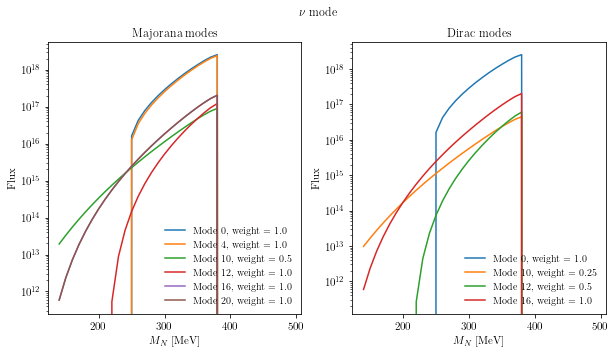

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'$\nu$ mode')

for mode, weight in zip(modes_majorana, weights_modes_majorana):
    axs[0].plot(masses_t2k, flux[:, mode]*weight, label=f'Mode {mode}, weight = {weight}')
axs[0].set_title('Majorana modes')

for mode, weight in zip(modes_dirac, weights_modes_dirac):
    axs[1].plot(masses_t2k, flux[:, mode]*weight, label=f'Mode {mode}, weight = {weight}')
axs[1].set_title('Dirac modes')

for ax in axs:
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel('Flux')
    ax.legend(frameon=False)
    ax.set_yscale('log')

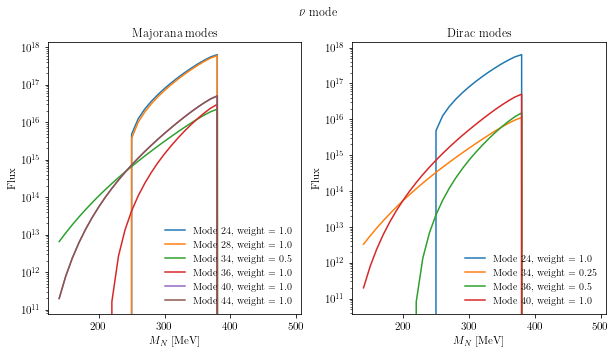

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'$\bar{\nu}$ mode')

for mode, weight in zip(modes_majorana, weights_modes_majorana):
    axs[0].plot(masses_t2k, flux[:, mode+24]*weight, label=f'Mode {mode+24}, weight = {weight}')
axs[0].set_title('Majorana modes')

for mode, weight in zip(modes_dirac, weights_modes_dirac):
    axs[1].plot(masses_t2k, flux[:, mode+24]*weight, label=f'Mode {mode+24}, weight = {weight}')
axs[1].set_title('Dirac modes')

for ax in axs:
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel('Flux')
    ax.legend(frameon=False)
    ax.set_yscale('log')

# Full limit

/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta


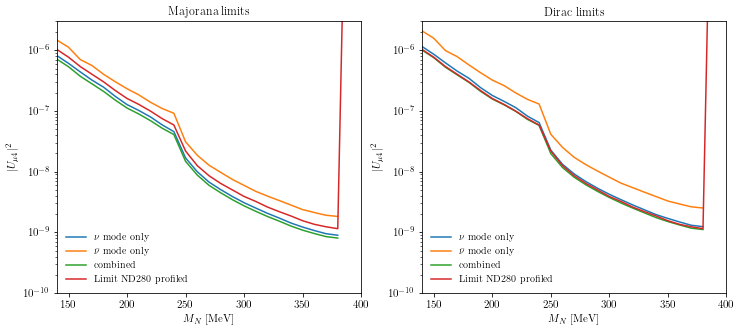

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title('Majorana limits')
axs[1].set_title('Dirac limits')
    
axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'$\nu$ mode only')
axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(5, 10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'$\bar{\nu}$ mode only')
axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'combined')

axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'$\nu$ mode only')
axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(5, 10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'$\bar{\nu}$ mode only')
axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'combined')

for ax in axs:
    ax.plot(nd280_limits_prof[:, 0], np.sqrt(2)*nd280_limits_prof[:, 2], label='Limit ND280 profiled')
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'$|U_{\mu 4}|^2$')
    ax.legend(frameon=False)
    ax.set_ylim(1e-10, 3e-6)
    ax.set_xlim(140, 400)

# Check POT scaling

/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta


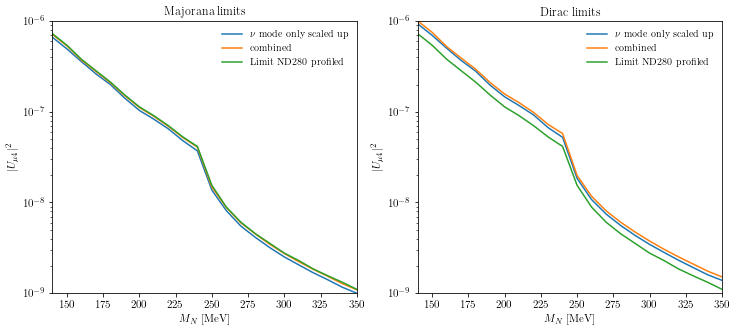

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_factor = (6.29+12.34)/12.34
axs[0].set_title('Majorana limits')
axs[1].set_title('Dirac limits')
    
axs[0].plot(masses_t2k, bayesian_upper_limit(pot_factor*n_events_T2K(eff, flux, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'$\nu$ mode only scaled up')
axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'combined')

axs[1].plot(masses_t2k, bayesian_upper_limit(pot_factor*n_events_T2K(eff, flux, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'$\nu$ mode only scaled up')
axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'combined')

for ax in axs:
    ax.plot(nd280_limits_prof[:, 0], nd280_limits_prof[:, 2], label='Limit ND280 profiled')
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'$|U_{\mu 4}|^2$')
    ax.legend(frameon=False)
    ax.set_ylim(1e-9, 1e-6)
    ax.set_xlim(140, 350)

# Contribution from different channels

/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_li

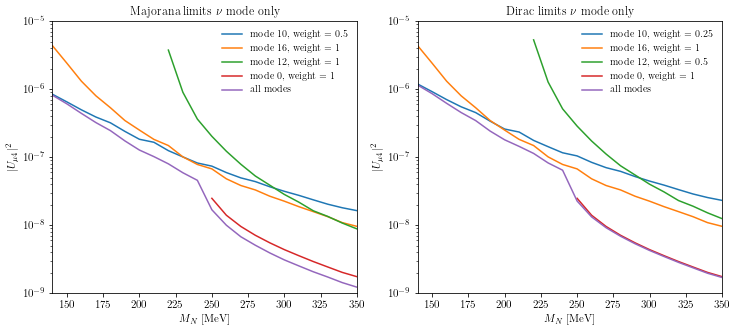

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title(r'Majorana limits $\nu$ mode only')
axs[1].set_title(r'Dirac limits $\nu$ mode only')

for mode, weight in zip([10, 16, 12, 0], [0.5, 1, 1, 1]):
    axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                              channels=np.arange(5), 
                                                              modes=[mode], 
                                                              mode_weights=[weight])),
                label=f'mode {mode}, weight = {weight}')
axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'all modes')


for mode, weight in zip([10, 16, 12, 0], [0.25, 1, 0.5, 1]):
    axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                              channels=np.arange(5), 
                                                              modes=[mode], 
                                                              mode_weights=[weight])),
                label=f'mode {mode}, weight = {weight}')
axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'all modes')


ax

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'$|U_{\mu 4}|^2$')
    ax.legend(frameon=False)
    ax.set_ylim(1e-9, 1e-5)
    ax.set_xlim(140, 350)